https://www.kaggle.com/yunusulucay/visualization-analysis-and-mapping-example

In [27]:
import seaborn as sns
sns.set_style("whitegrid")

<p id='1'><h2><b>Content of the Dataset</b></h2></p>
<b>ID</b> - Unique identifier for the record.

<b>Case Number</b> - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

<b>Date</b> - Date when the incident occurred. this is sometimes a best estimate.

<b>Block</b> - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

<b>IUCR</b> - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description.

<b>Primary Type</b> - The primary description of the IUCR code.

<b>Description</b> - The secondary description of the IUCR code, a subcategory of the primary description.

<b>Location Description</b> - Description of the location where the incident occurred.

<b>Arrest</b> - Indicates whether an arrest was made.

<b>Domestic</b> - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

<b>Beat</b> - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.

<b>District</b> - Indicates the police district where the incident occurred.

<b>Ward</b> - The ward (City Council district) where the incident occurred.

<b>Community Area</b> - Indicates the community area where the incident occurred. Chicago has 77 community areas.

<b>FBI Code</b> - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).

<b>X Coordinate</b> - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

<b>Y Coordinate</b> - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

<b>Year</b> - Year the incident occurred.

<b>Updated On</b> - Date and time the record was last updated.

<b>Latitude</b> - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

<b>Longitude</b> - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

<b>Location</b> - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

<p id='2'><h2><b>Analyzing the Data</b></h2></p>

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings 
warnings.filterwarnings("ignore")

In [29]:
data = pd.read_csv("data/chicago/Chicago_Crimes_2012_to_2017.csv",error_bad_lines=False,warn_bad_lines=False)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In this dataset we have 1.456.714 samples so it is hard for cpu to use all of the samples.  
Therefore, we will use random 200.000 samples

In [31]:
data_samples = data.sample(n=200000,random_state = 42)

In [32]:
data_samples.dropna(axis=0,inplace=True)

<p id='4'><h2><b>Visualization of Primary Types</b></h2></p>

In this visualization we will see most common 10 primary types, associated with crimes.

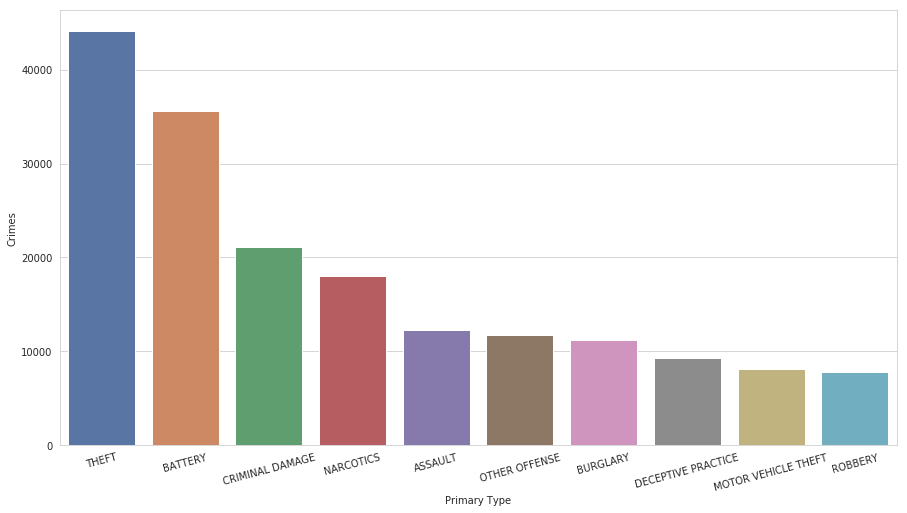

In [33]:
PrimaryType = data_samples["Primary Type"]
PrimaryTypeCounted = Counter(PrimaryType)
MostCommonPT = PrimaryTypeCounted.most_common(10)
x,y = zip(*MostCommonPT)
x,y  = list(x),list(y)

# %% 

plt.figure(figsize=(15,8))
ax = sns.barplot(x=x, y=y,palette = "deep")
plt.xticks(rotation= 15)
plt.xlabel("Primary Type")
plt.ylabel("Crimes")
plt.show()


<p id='7'><h2><b>Plotting Primary Types Until 2012 to 2017</b></h2></p>

In [43]:
crimes2012 = Crimes.loc["2012"]
crimes2013 = Crimes.loc["2013"]
crimes2014 = Crimes.loc["2014"]
crimes2015 = Crimes.loc["2015"]
crimes2016 = Crimes.loc["2016"]

Making DataFrame.

In [44]:
crimes2012 = pd.DataFrame(crimes2012)
crimes2013 = pd.DataFrame(crimes2013)
crimes2014 = pd.DataFrame(crimes2014)
crimes2015 = pd.DataFrame(crimes2015)
crimes2016 = pd.DataFrame(crimes2016)

We select THEFT BATTERY ... in Primary Type, and we send those rows into theft_2012 ... 

In [45]:
theft_2012 = pd.DataFrame(crimes2012[crimes2012['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2013 = pd.DataFrame(crimes2013[crimes2013['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2014 = pd.DataFrame(crimes2014[crimes2014['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2015 = pd.DataFrame(crimes2015[crimes2015['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2016 = pd.DataFrame(crimes2016[crimes2016['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])

In [46]:
grouper2012 = theft_2012.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper2013 = theft_2013.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper2014 = theft_2014.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper2015 = theft_2015.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper2016 = theft_2016.groupby([pd.TimeGrouper('M'), 'Primary Type'])

In [47]:
data_2012 = grouper2012['Primary Type'].count().unstack()
data_2013 = grouper2013['Primary Type'].count().unstack()
data_2014 = grouper2014['Primary Type'].count().unstack()
data_2015 = grouper2015['Primary Type'].count().unstack()
data_2016 = grouper2016['Primary Type'].count().unstack()

In [48]:
DataAll = pd.DataFrame()
DataAll=DataAll.append([data_2012,data_2013,data_2014,data_2015,data_2016])

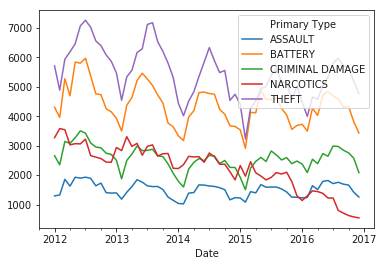

In [24]:
DataAll.plot()
plt.show()

I have got help from another kernel to plotting this map.  
First we import folium library to create map.  
Using of as below (if you want to create a map you want to create you can write google for ex. Location of Miami).

In [66]:
# https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps